In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline

In [2]:
bg = pd.read_csv('data/census_tract_socio_burg.csv')

In [3]:
bg.head()

,Unnamed: 0,Unnamed: 0.1,geoid,name,pop,white,black,asian,over 15 under 65,Less than High School,High School Graduate,Bachelor or Higher,unemployment,Renter Occupied,income below Poverty,burglary count
0,0,1,14000US36005000200,"Census Tract 2, Bronx, NY",5058,2665,1233,158,1778,468,976,410,263,2421,1019,164
1,1,2,14000US36005000400,"Census Tract 4, Bronx, NY",5944,2616,1962,54,2146,259,704,1077,232,1362,428,328
2,2,4,14000US36005001900,"Census Tract 19, Bronx, NY",2817,519,1054,78,953,355,426,420,200,2034,684,2835
3,3,5,14000US36005002000,"Census Tract 20, Bronx, NY",9608,3344,4500,104,2421,1711,1530,622,560,7879,3417,123
4,4,6,14000US36005002300,"Census Tract 23, Bronx, NY",4733,629,1915,0,1222,697,909,129,283,4712,1620,420


In [4]:
# delete unwanted columns
bg.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [5]:
# remove unpopulated areas
bg = bg[bg['pop'] != 0]

In [6]:
# Normalising data to population
for i in range (3, 13):
    bg.iloc[:, i] = bg.iloc[:, i].astype('float').div(bg['pop'], axis=0)    
bg.head()

,geoid,name,pop,white,black,asian,over 15 under 65,Less than High School,High School Graduate,Bachelor or Higher,unemployment,Renter Occupied,income below Poverty,burglary count
0,14000US36005000200,"Census Tract 2, Bronx, NY",5058,0.526888,0.243772,0.031238,0.351522,0.092527,0.192962,0.081060,0.051997,0.478648,0.201463,164
1,14000US36005000400,"Census Tract 4, Bronx, NY",5944,0.440108,0.330081,0.009085,0.361036,0.043573,0.118439,0.181191,0.039031,0.229139,0.072005,328
2,14000US36005001900,"Census Tract 19, Bronx, NY",2817,0.184239,0.374157,0.027689,0.338303,0.126021,0.151225,0.149095,0.070998,0.722045,0.242812,2835
3,14000US36005002000,"Census Tract 20, Bronx, NY",9608,0.348043,0.468360,0.010824,0.251978,0.178081,0.159242,0.064738,0.058285,0.820046,0.355641,123
4,14000US36005002300,"Census Tract 23, Bronx, NY",4733,0.132897,0.404606,0.000000,0.258187,0.147264,0.192056,0.027255,0.059793,0.995563,0.342278,420


In [7]:
# Normalising population to total population
bg['pop'] = bg['pop'] / bg['pop'].sum()

## Data standardisation

In [8]:
for i in range (2, 14):
    col = bg.columns[i]
    bg[col] = (bg[col] - bg[col].mean()) / bg[col].std()
bg.head()

,geoid,name,pop,white,black,asian,over 15 under 65,Less than High School,High School Graduate,Bachelor or Higher,unemployment,Renter Occupied,income below Poverty,burglary count
0,14000US36005000200,"Census Tract 2, Bronx, NY",0.383783,0.367060,-0.055688,-0.647955,0.602365,0.078840,1.049417,-0.917659,0.544800,-0.442229,0.840239,-0.479539
1,14000US36005000400,"Census Tract 4, Bronx, NY",0.782237,0.071767,0.231861,-0.780121,0.773437,-0.702822,-0.284621,-0.224092,-0.054692,-1.421839,-0.792587,-0.166255
2,14000US36005001900,"Census Tract 19, Bronx, NY",-0.624048,-0.798897,0.378706,-0.669127,0.364670,0.613654,0.302282,-0.446410,1.423319,0.513385,1.361760,4.622790
3,14000US36005002000,"Census Tract 20, Bronx, NY",2.430024,-0.241507,0.692556,-0.769743,-1.187560,1.444924,0.445805,-1.030714,0.835530,0.898153,2.784860,-0.557860
4,14000US36005002300,"Census Tract 23, Bronx, NY",0.237622,-0.973601,0.480152,-0.834322,-1.075903,0.952856,1.033201,-1.290338,0.905262,1.587260,2.616309,0.009490


## Correlation

In [9]:
correlation = bg.corr(method='pearson')
correlation = correlation['burglary count']
correlation

pop                      0.184243
white                   -0.130104
black                    0.147795
asian                   -0.168599
over 15 under 65         0.133874
Less than High School    0.161269
High School Graduate     0.070741
Bachelor or Higher      -0.037037
unemployment             0.155911
Renter Occupied          0.307909
income below Poverty     0.256788
burglary count           1.000000
Name: burglary count, dtype: float64

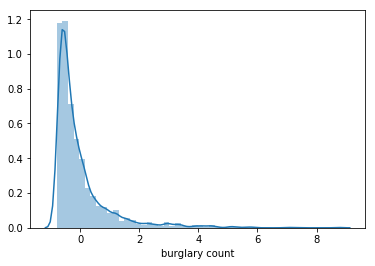

In [10]:
# histogram
sns.distplot(bg['burglary count'])

## Linear regression

In [11]:
bg.head()

,geoid,name,pop,white,black,asian,over 15 under 65,Less than High School,High School Graduate,Bachelor or Higher,unemployment,Renter Occupied,income below Poverty,burglary count
0,14000US36005000200,"Census Tract 2, Bronx, NY",0.383783,0.367060,-0.055688,-0.647955,0.602365,0.078840,1.049417,-0.917659,0.544800,-0.442229,0.840239,-0.479539
1,14000US36005000400,"Census Tract 4, Bronx, NY",0.782237,0.071767,0.231861,-0.780121,0.773437,-0.702822,-0.284621,-0.224092,-0.054692,-1.421839,-0.792587,-0.166255
2,14000US36005001900,"Census Tract 19, Bronx, NY",-0.624048,-0.798897,0.378706,-0.669127,0.364670,0.613654,0.302282,-0.446410,1.423319,0.513385,1.361760,4.622790
3,14000US36005002000,"Census Tract 20, Bronx, NY",2.430024,-0.241507,0.692556,-0.769743,-1.187560,1.444924,0.445805,-1.030714,0.835530,0.898153,2.784860,-0.557860
4,14000US36005002300,"Census Tract 23, Bronx, NY",0.237622,-0.973601,0.480152,-0.834322,-1.075903,0.952856,1.033201,-1.290338,0.905262,1.587260,2.616309,0.009490


In [12]:
# prepare x
to_drop = ['geoid', 'name', 'burglary count']
x = bg.copy()
x.drop(to_drop, axis=1, inplace=True)

# prepare y
y = bg['burglary count']

In [13]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
lm.score(x, y)

0.16453038523707794

## k means

In [15]:
from sklearn.cluster import KMeans

In [16]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(bg.iloc[:,2:])

In [17]:
bg['cluster'] = kmeans.predict(bg.iloc[:,2:])

In [18]:
bg['cluster'].value_counts()

2    450
0    368
3    336
4    292
5    251
1    108
Name: cluster, dtype: int64

In [19]:
len(bg['cluster'].unique())

6

In [20]:
#for i in range(len(bg['cluster'].unique())):
    
cl0 = bg[bg['cluster'] == 0]
cl1 = bg[bg['cluster'] == 1]
cl2 = bg[bg['cluster'] == 2]
cl3 = bg[bg['cluster'] == 3]
cl4 = bg[bg['cluster'] == 4]
cl5 = bg[bg['cluster'] == 5]

In [21]:
c0 = cl0.agg('mean').drop('cluster')
c1 = cl1.agg('mean').drop('cluster')
c2 = cl2.agg('mean').drop('cluster')
c3 = cl3.agg('mean').drop('cluster')
c4 = cl4.agg('mean').drop('cluster')
c5 = cl5.agg('mean').drop('cluster')

In [22]:
x = np.arange(12)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

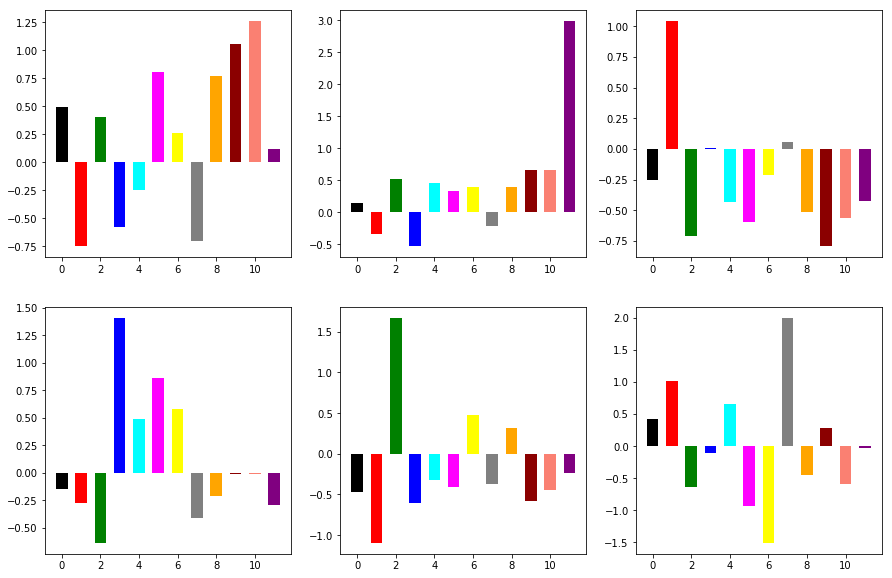

In [23]:
cls = ['black', 'red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'grey', 'orange', 'darkred', 'salmon', 'purple']
import matplotlib.patches as mpatches

fig = plt.figure()
fig.set_size_inches(15, 10)
ax  = fig.subplots(nrows=2, ncols=3)

ax[0, 0].bar(x+0, c0, color=cls, width=.6)
ax[0, 1].bar(x, c1, color=cls, width=.6)
ax[0, 2].bar(x, c2, color=cls, width=.6)
ax[1, 0].bar(x, c3, color=cls, width=.6)
ax[1, 1].bar(x, c4, color=cls, width=.6)
ax[1, 2].bar(x, c5, color=cls, width=.6)
plt.savefig('images/cluster_chart.jpg')
plt.show()

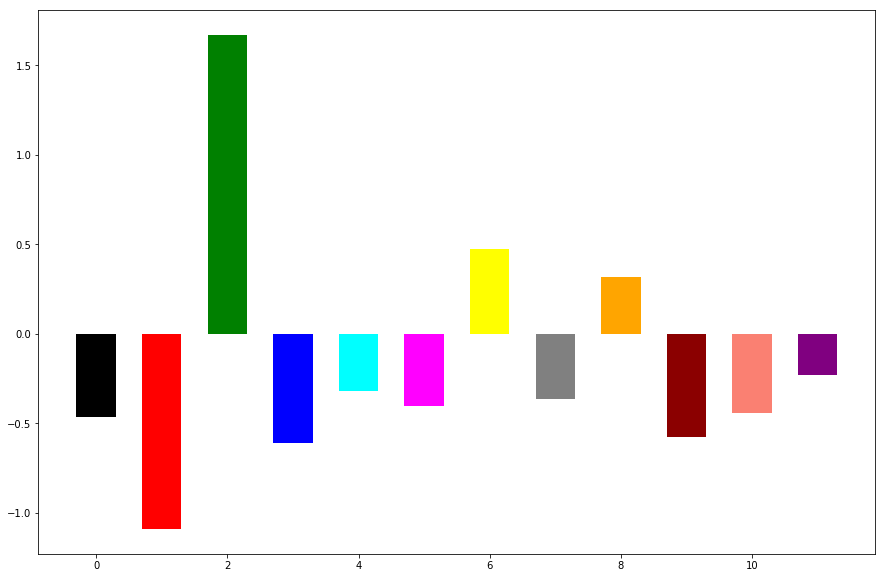

In [25]:
cls = ['black', 'red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'grey', 'orange', 'darkred', 'salmon', 'purple']

fig = plt.figure()
fig.set_size_inches(15, 10)

plt.bar(x+0, c4, color=cls, width=.6)
plt.savefig('images/cl_high_crime.jpg')
plt.show()

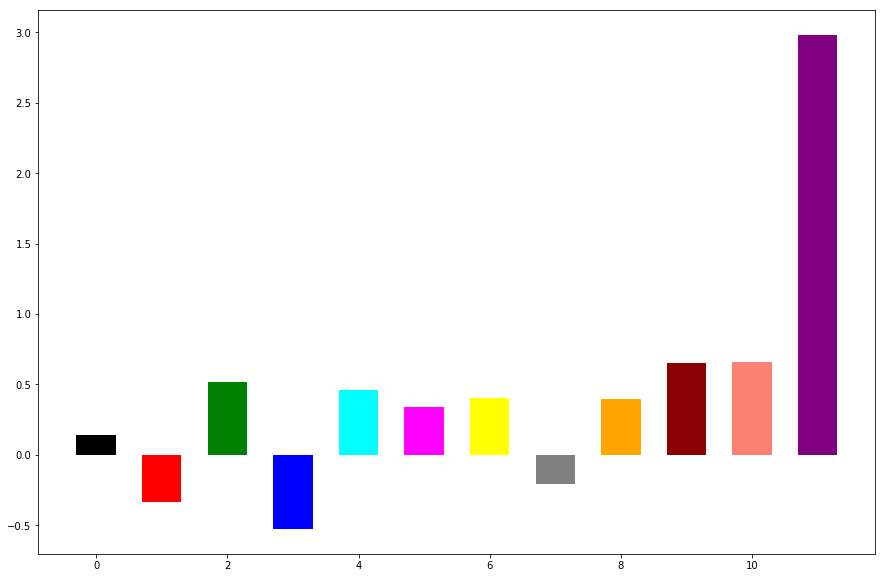

In [26]:
cls = ['black', 'red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'grey', 'orange', 'darkred', 'salmon', 'purple']

fig = plt.figure()
fig.set_size_inches(15, 10)

plt.bar(x+0, c1, color=cls, width=.6)
plt.savefig('images/cl_low_crime.jpg')
plt.show()

### Visualising clusters

In [24]:
# open shape file, downloaded from Census Reporter
mp = gpd.read_file('shape/New_York/new_york.shp')
mp.rename(columns={'name_1':'name'}, inplace=True)

In [25]:
high = bg[(bg['cluster']==1) | (bg['cluster']==0)]
high = high[['name', 'geoid']]
high.head()

,name,geoid
0,"Census Tract 2, Bronx, NY",14000US36005000200
2,"Census Tract 19, Bronx, NY",14000US36005001900
3,"Census Tract 20, Bronx, NY",14000US36005002000
4,"Census Tract 23, Bronx, NY",14000US36005002300
5,"Census Tract 25, Bronx, NY",14000US36005002500


In [26]:
high = high.merge(mp, on='name')
high.head()

,name,geoid,geoid_1,geoid_2,name_2,B01003001,B01003001e,index_righ,geometry
0,"Census Tract 2, Bronx, NY",14000US36005000200,14000US36005000200,86000US10473,10473,62531.0,2182.0,195685,"POLYGON ((-73.865218 40.814529, -73.864255 40...."
1,"Census Tract 2, Bronx, NY",14000US36005000200,14000US36005000200,86000US10473,10473,62531.0,2182.0,195685,"POLYGON ((-73.865218 40.814529, -73.864255 40...."
2,"Census Tract 2, Bronx, NY",14000US36005000200,14000US36005000200,86000US10473,10473,62531.0,2182.0,61906,"POLYGON ((-73.865218 40.814529, -73.864255 40...."
3,"Census Tract 2, Bronx, NY",14000US36005000200,14000US36005000200,86000US10473,10473,62531.0,2182.0,61906,"POLYGON ((-73.865218 40.814529, -73.864255 40...."
4,"Census Tract 2, Bronx, NY",14000US36005000200,14000US36005000200,86000US10473,10473,62531.0,2182.0,396094,"POLYGON ((-73.865218 40.814529, -73.864255 40...."


In [28]:
high = gpd.GeoDataFrame(high)
# assign projection to burglary
high.crs = {'init': 'epsg:4326'}

In [29]:
low = bg[bg['cluster']== 2]
low = low[['name', 'geoid']]
low.head()

,name,geoid
1,"Census Tract 4, Bronx, NY",14000US36005000400
48,"Census Tract 98, Bronx, NY",14000US36005009800
51,"Census Tract 118, Bronx, NY",14000US36005011800
58,"Census Tract 130, Bronx, NY",14000US36005013000
60,"Census Tract 132, Bronx, NY",14000US36005013200


In [30]:
low = low.merge(mp, on='name')
low.head()

,name,geoid,geoid_1,geoid_2,name_2,B01003001,B01003001e,index_righ,geometry
0,"Census Tract 4, Bronx, NY",14000US36005000400,14000US36005000400,86000US10473,10473,62531.0,2182.0,195685,"POLYGON ((-73.85959699999999 40.815283, -73.85..."
1,"Census Tract 4, Bronx, NY",14000US36005000400,14000US36005000400,86000US10473,10473,62531.0,2182.0,195685,"POLYGON ((-73.85959699999999 40.815283, -73.85..."
2,"Census Tract 4, Bronx, NY",14000US36005000400,14000US36005000400,86000US10473,10473,62531.0,2182.0,61906,"POLYGON ((-73.85959699999999 40.815283, -73.85..."
3,"Census Tract 4, Bronx, NY",14000US36005000400,14000US36005000400,86000US10473,10473,62531.0,2182.0,61906,"POLYGON ((-73.85959699999999 40.815283, -73.85..."
4,"Census Tract 4, Bronx, NY",14000US36005000400,14000US36005000400,86000US10473,10473,62531.0,2182.0,396094,"POLYGON ((-73.85959699999999 40.815283, -73.85..."


In [31]:
low = gpd.GeoDataFrame(low)
# assign projection to burglary
low.crs = {'init': 'epsg:4326'}

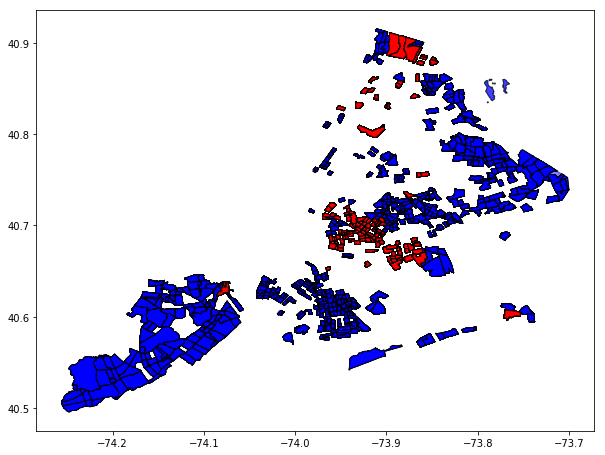

In [67]:
fig, ax = plt.subplots(figsize = (10,10))
low.plot(color='blue',
                      edgecolor = 'black',
                      ax = ax,
                      alpha=.5)
high.plot(color='red',
                      edgecolor = 'black',
                      ax = ax,
                      alpha=.5)

In [32]:
zc = gpd.read_file('shape/zipcode/newyork.shp')
#mp = gpd.read_file('shape/New_York/new_york.shp')
zc.head()

,geoid,name,B01003001,B01003001e,index_righ,geometry
0,86000US10001,10001,23947.0,1738.0,200815,"POLYGON ((-74.00828 40.750272, -74.007829 40.7..."
1,86000US10001,10001,23947.0,1738.0,281729,"POLYGON ((-74.00828 40.750272, -74.007829 40.7..."
2,86000US10001,10001,23947.0,1738.0,104215,"POLYGON ((-74.00828 40.750272, -74.007829 40.7..."
3,86000US10001,10001,23947.0,1738.0,53391,"POLYGON ((-74.00828 40.750272, -74.007829 40.7..."
4,86000US10001,10001,23947.0,1738.0,239528,"POLYGON ((-74.00828 40.750272, -74.007829 40.7..."


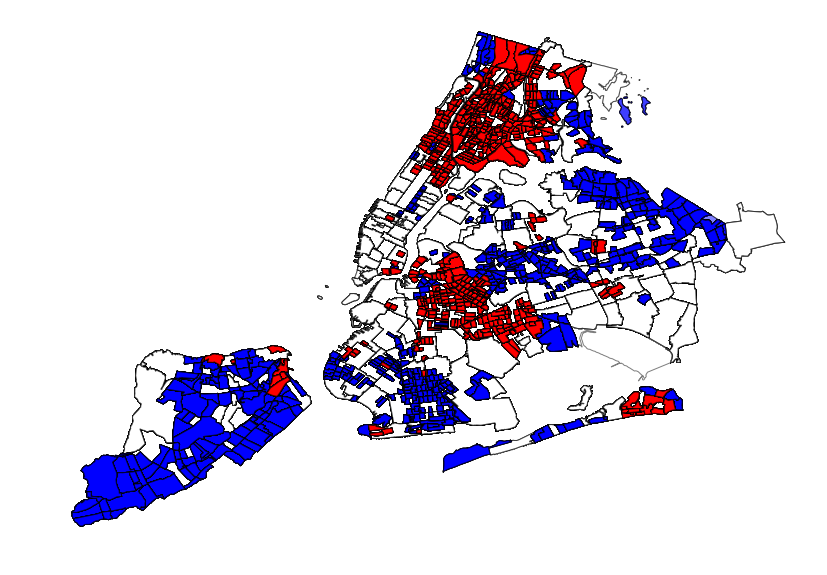

In [34]:
fig, ax = plt.subplots(figsize = (15,10))
zc.plot(color='white',
                      edgecolor = 'black',
                      ax = ax,
                      alpha=.5)
low.plot(color='blue',
                      edgecolor = 'black',
                      ax = ax,
                      alpha=.5)
high.plot(color='red',
                      edgecolor = 'black',
                      ax = ax,
                      alpha=.5)
ax.axis('off')
plt.savefig('images/high_low_map.jpg')

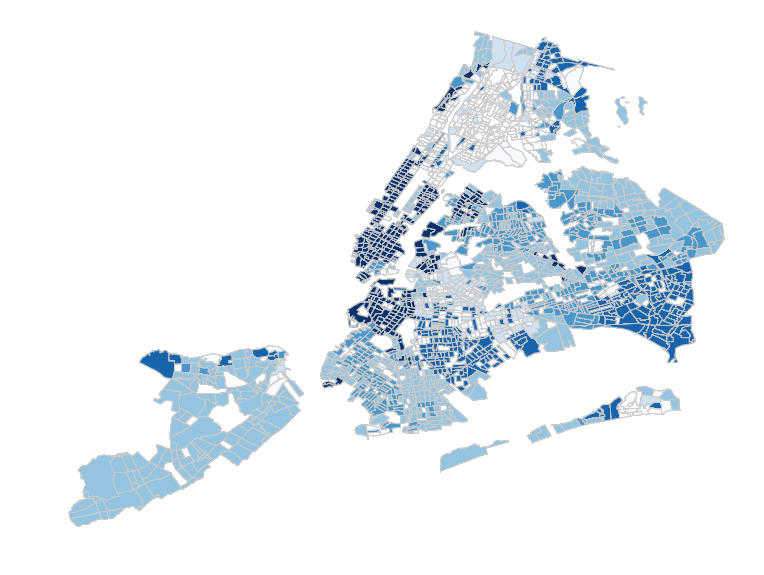

In [38]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'cluster'
# set the range for the choropleth
vmin, vmax = 0, 5
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 10))
ax.axis('off')
data.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')